In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:

class Transition:
    def __init__(self, Qu, Qv):
        self.Qu = Qu
        self.Qv = Qv
    def gamma_u(self, k):
        return (0+2j) * k * self.Qu
    def gamma_v(self, k):
        return (0+2j) * k * self.Qv
    def t(self, k):
        if k == 0:
            return 0.+0j
        gu = self.gamma_u(k)
        gv = self.gamma_v(k)
        return gu / (gv - 1 +  1 / (1-gv))
    def r(self, k):
        return 1 - self.t(k)
    def r_tilde(self, k):
        gu = self.gamma_u(k)
        gv = self.gamma_v(k)
        return gu / ((gu-1)*(gv-1)+1)
    def t_tilde(self, k):
        return self.r_tilde(k)


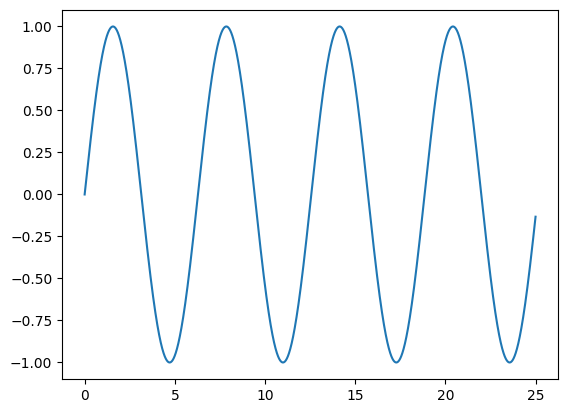

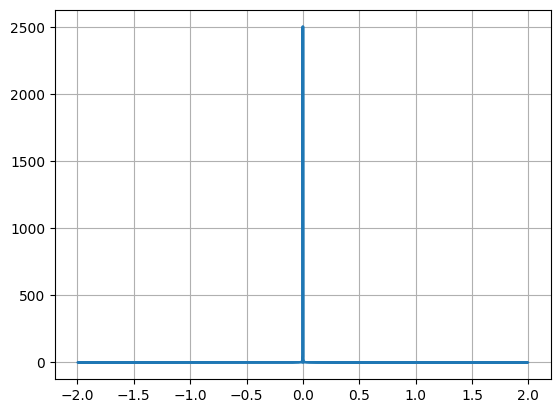

In [3]:
M = Transition(1., 1.)
x = np.linspace(0, 25, 5000)
y = np.sin(x) # k = 1
plt.plot(x, y)
plt.show()
yfft = np.fft.fft(y)
freqs = np.fft.fftfreq(len(yfft), 0.25)
plt.plot(freqs, np.abs(yfft))
plt.grid()
plt.show()

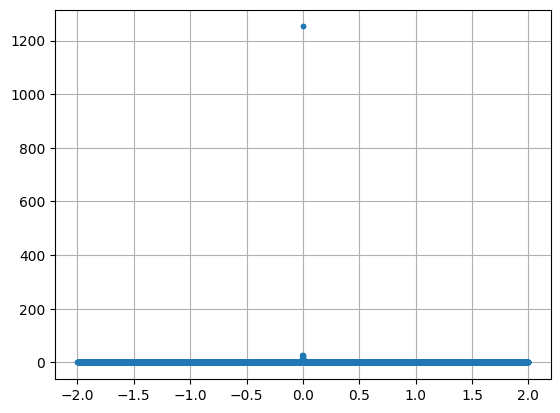

In [4]:

tpi = np.pi * 2
yfft_t = np.array([M.t(k/tpi) for k in freqs])
yfft_t = yfft_t * yfft # multiply by the original spectrum
plt.plot(freqs, np.abs(yfft_t), ".")
plt.grid()
plt.show()

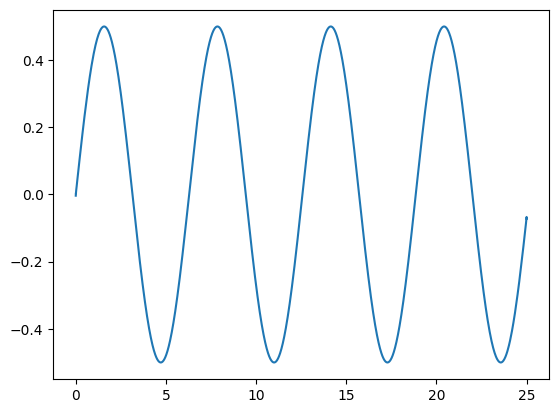

In [5]:
y_t = np.fft.ifft(yfft_t)
plt.plot(x, np.real(y_t))
plt.show()

In [6]:
print(abs(M.t(1./2/np.pi)))

0.5181972522832335


In [7]:
max(np.abs(np.real(y_t)))

0.5001776562642662

In [9]:
np.abs(M.t(1))

0.7905694150420949

In [10]:
1/(1-1/(0+2j-1))

(0.75-0.25000000000000006j)